<h1 style="background:linear-gradient(to right, #BDC3C7, #2C3E50);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  CUSTOMER SEGMENTATION
</h1>

<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  IMPORT LIBRAIES
</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv(r"C:\Users\Shuhaib\Downloads\13_customer_segmentation.csv")
df

,customer_id,age,income,spending_score,visits_per_month
0,CUST1000,56,120186,55,9
1,CUST1001,69,49674,80,1
2,CUST1002,46,61271,62,8
3,CUST1003,32,88688,30,6
4,CUST1004,60,126076,55,6
...,...,...,...,...,...
995,CUST1995,60,57828,86,17
996,CUST1996,64,63604,66,11
997,CUST1997,62,25526,88,9
998,CUST1998,35,83910,34,10


In [3]:
df.columns

Index(['customer_id', 'age', 'income', 'spending_score', 'visits_per_month'], dtype='object')

In [4]:
df.describe()

,age,income,spending_score,visits_per_month
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,43.81900,83958.460000,48.681000,10.087000
std,14.99103,39293.028951,29.082659,5.543299
min,18.00000,15126.000000,1.000000,1.000000
25%,31.00000,50012.250000,22.000000,5.000000
50%,44.00000,84322.000000,48.000000,10.000000
75%,56.00000,118153.000000,74.000000,15.000000
max,69.00000,149869.000000,99.000000,19.000000


In [5]:
df.isnull().sum()

customer_id         0
age                 0
income              0
spending_score      0
visits_per_month    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       1000 non-null   object
 1   age               1000 non-null   int64 
 2   income            1000 non-null   int64 
 3   spending_score    1000 non-null   int64 
 4   visits_per_month  1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
df = df.drop(columns=['customer_id'])
df

,age,income,spending_score,visits_per_month
0,56,120186,55,9
1,69,49674,80,1
2,46,61271,62,8
3,32,88688,30,6
4,60,126076,55,6
...,...,...,...,...
995,60,57828,86,17
996,64,63604,66,11
997,62,25526,88,9
998,35,83910,34,10


In [8]:
# dff=df.copy()
# dff

<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  SCALING
</h1>

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 8.12959173e-01,  9.22445236e-01,  2.17385966e-01,
        -1.96190750e-01],
       [ 1.68057836e+00, -8.72969481e-01,  1.07743489e+00,
        -1.64009692e+00],
       [ 1.45559803e-01, -5.77680389e-01,  4.58199665e-01,
        -3.76679021e-01],
       ...,
       [ 1.21339880e+00, -1.48783893e+00,  1.35265055e+00,
        -1.96190750e-01],
       [-5.88579505e-01, -1.23391475e-03, -5.05055130e-01,
        -1.57024796e-02],
       [ 7.46219236e-01, -1.10422028e+00,  1.45585642e+00,
         1.42820369e+00]])

<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  KMEANS
</h1>

In [11]:
from sklearn.cluster import KMeans

C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

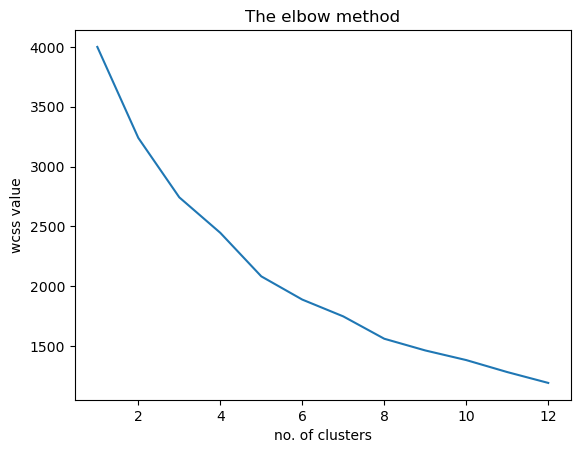

In [12]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()

In [13]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X_scaled)

C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [14]:
y_kmeans

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [15]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score:", score1)

Silhouette Score: 0.18693901571704688


<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  PCA
</h1>

In [16]:
from sklearn.decomposition import PCA

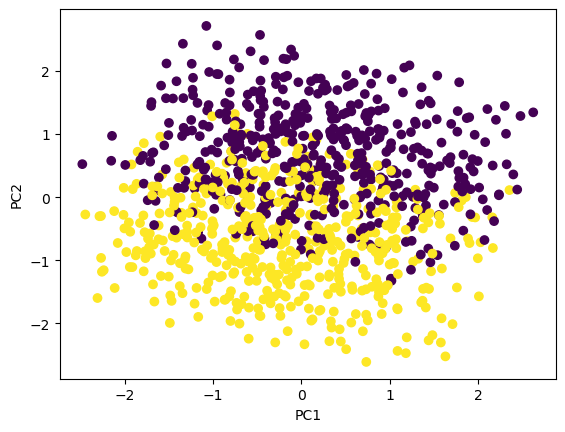

In [17]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.scatter(reduced[:,0], reduced[:,1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  DBSCAN
</h1>

In [18]:
dbscan = DBSCAN(eps=1.1, min_samples=250)
labels = dbscan.fit_predict(reduced)


In [19]:
labels

array([ 0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0

In [20]:
set(labels)

{np.int64(-1), np.int64(0)}

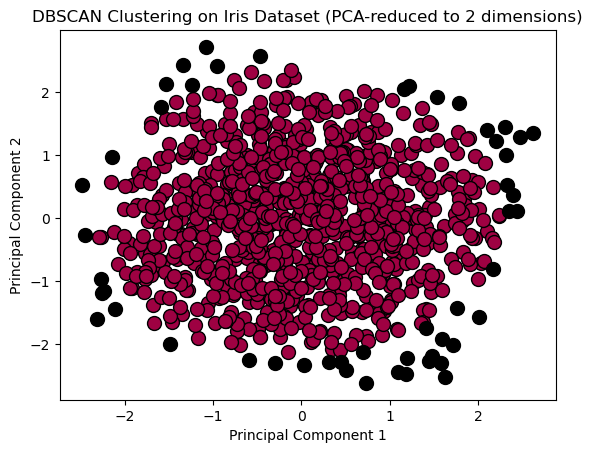

In [21]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy = reduced[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [22]:
unique_labels 

{np.int64(-1), np.int64(0)}

In [23]:
from sklearn.metrics import silhouette_score
score2 = silhouette_score(reduced, labels)
print("Silhouette Score:", score2)

Silhouette Score: 0.3426425923479043


<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  AGGLOMERATIVE
</h1>

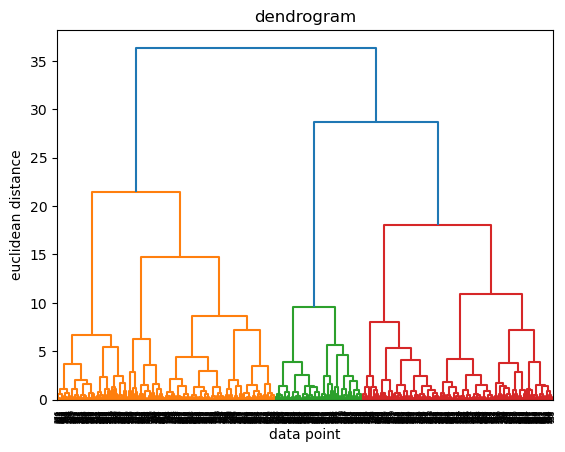

In [24]:
dendrogram=sch.dendrogram(sch.linkage(reduced,method='ward'))
plt.title('dendrogram')
plt.xlabel('data point')
plt.ylabel('euclidean distance')
plt.show()

In [25]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage= 'ward')

y_ahc=ahc.fit_predict(reduced)

In [26]:
y_ahc

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [27]:
score3=silhouette_score(reduced,y_ahc)
score3

np.float64(0.2985242247661034)

<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  FUZZY
</h1>

In [28]:
import skfuzzy as fuzz
x_fuzzy=X_scaled.T
n_clusters=2
fuzziness=2.0
cntr,u,u0,d,jm,p,fpc=fuzz.cluster.cmeans(
    x_fuzzy,
    c=n_clusters,
    m=fuzziness,
    error=0.005,
    maxiter=1000,
    init=None
)

In [29]:
cluster_range = range(2, 7)
fpc_values = []            

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        x_fuzzy,
        c=c,
        m=2,
        error=0.005,
        maxiter=1000
    )
    fpc_values.append(fpc)

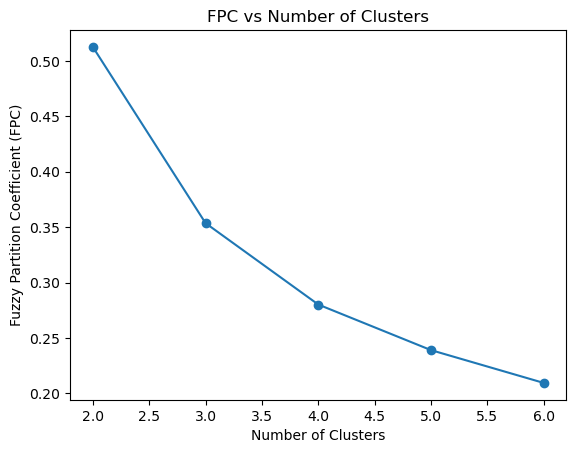

In [30]:
plt.figure()
plt.plot(cluster_range, fpc_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Fuzzy Partition Coefficient (FPC)")
plt.title("FPC vs Number of Clusters")
plt.show()

In [31]:

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    reduced.T, c=2, m=2, error=0.005, maxiter=1000
)


u_transposed = u.T

hard_clusters = np.argmax(u_transposed, axis=1)


score4 = silhouette_score(reduced, hard_clusters)
print("Silhouette Score:",score4)

Silhouette Score: 0.3201739284040789


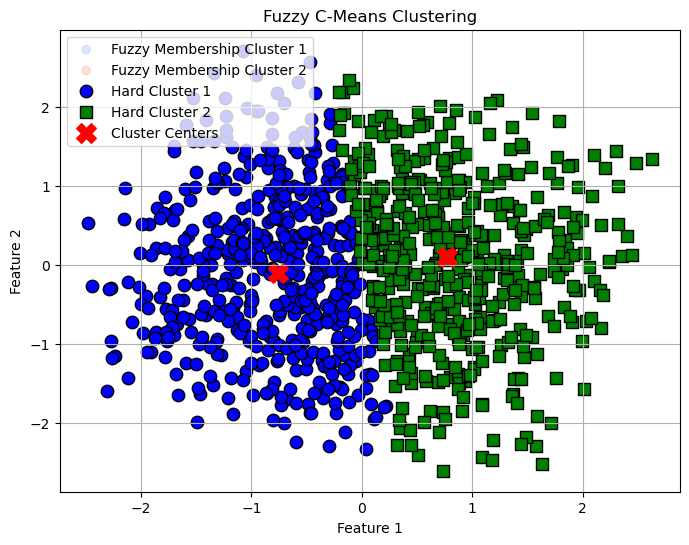

In [32]:
n_clusters = u.shape[0] 

fig, ax = plt.subplots(figsize=(8, 6))


for i in range(n_clusters):
    ax.scatter(
        reduced[:, 0],
        reduced[:, 1],
        c=u[i],                
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Membership Cluster {i+1}'
    )


markers = ['o', 's', '^', 'D']
colors = ['blue', 'green', 'orange', 'purple']

for i in range(n_clusters):
    cluster_points = reduced[hard_clusters == i]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        c=colors[i],
        marker=markers[i],
        edgecolor='k',
        s=80,
        label=f'Hard Cluster {i+1}'
    )


ax.scatter(
    cntr[:, 0],
    cntr[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

<h1 style="background:linear-gradient(to right, #20B2AA, #4682B4);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  TABULATE
</h1>

In [33]:
from tabulate import tabulate

table = [
    ['Clustering Method', 'Silhouette Score'],
    ['KMeans',score1],
    ['DBSCAN', score2],
    ['Agglomerative', score3],
    ['Fuzzy C-Means', score4],
   
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════════════╕
│ Clustering Method   │   Silhouette Score │
╞═════════════════════╪════════════════════╡
│ KMeans              │           0.186939 │
├─────────────────────┼────────────────────┤
│ DBSCAN              │           0.342643 │
├─────────────────────┼────────────────────┤
│ Agglomerative       │           0.298524 │
├─────────────────────┼────────────────────┤
│ Fuzzy C-Means       │           0.320174 │
╘═════════════════════╧════════════════════╛


In [34]:
df=pd.DataFrame(df)
df['cluster']= labels

In [35]:
df

,age,income,spending_score,visits_per_month,cluster
0,56,120186,55,9,0
1,69,49674,80,1,-1
2,46,61271,62,8,0
3,32,88688,30,6,0
4,60,126076,55,6,0
...,...,...,...,...,...
995,60,57828,86,17,0
996,64,63604,66,11,0
997,62,25526,88,9,0
998,35,83910,34,10,0


In [36]:
cluster_summary=df.groupby('cluster')[['age', 'income', 'spending_score', 'visits_per_month']].mean().round(2)
cluster_summary['count']=df['cluster'].value_counts()
cluster_summary

,age,income,spending_score,visits_per_month,count
cluster,,,,,
-1,44.98,98695.47,60.10,8.88,51
0,43.76,83166.48,48.07,10.15,949


| Cluster | Key Characteristics                                                                                      | Conclusion                                                                                                                                  |
| ------- | -------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **-1**  | Higher age, highest income, highest spending score, fewer monthly visits, small customer count           | Represents **high-value customers** who spend more per visit but visit less frequently. Suitable for **premium or personalized offers**.    |
| **0**   | Slightly younger, moderate income, moderate spending score, highest monthly visits, large customer count | Represents **regular and loyal customers** who visit frequently but spend moderately. Suitable for **engagement and retention strategies**. |
